### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


**2. Investigate the dataset for missing or problematic data.**

- Use summary statistics or data visualization to identify columns with missing values. Python libraries like Pandas provide functions like isnull() or info() to check for missing values. Python libraries like Pandas provide functions like isnull() or info() to check for missing values.co

In [5]:
# Identify missing values
missing_values = data.isnull().sum().sort_values()

# Display columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64


- Use heatmaps or bar charts to visualize missing data patterns. This can provide a quick overview of which columns have the most missing values.

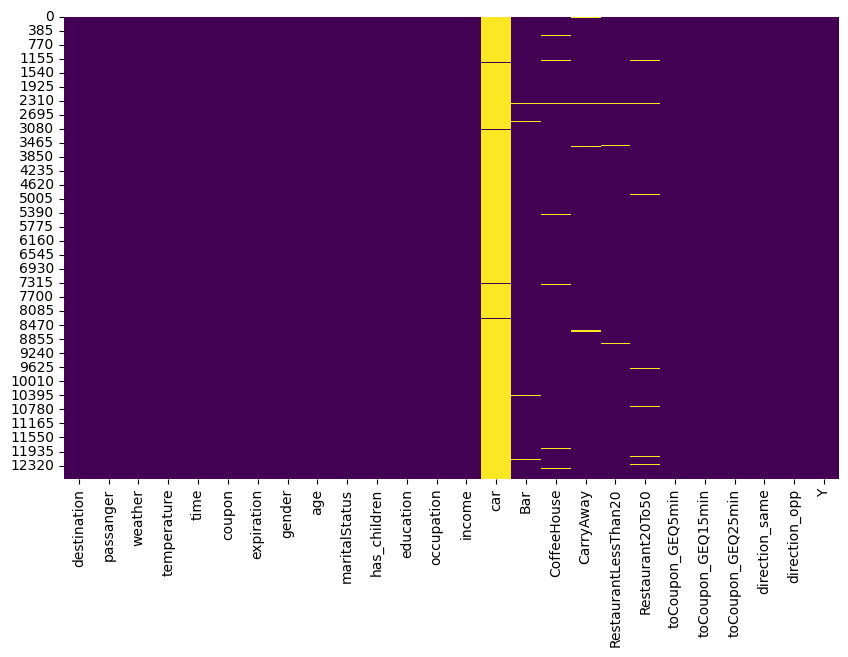

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()

**3. Decide what to do about your missing data for example ( drop, replace, other...)**

- Columns *expiration:* convert everything to hours. So, its type can be defined as a numerical.
- Columns *income:* replace all blank spaces sign "$", and "-" into " ". For definig the value in numerical type and I replace the income range into their averages.
- Columns *Bar, RestaurantLessThan20, Restaurant20To50, CoffeeHouse, CarryAway:* replace with a single value, using their average. So, in this way the type is a numerical.
- Clean *passenger* value from "()" characters.
- Normalize *expiration*: time from day to hours and delete 'h', convert in numerical value.
- Normalize *age* value for 50plus, below21 - convert in numerical value.
- Rename coupon values, normalize the name in according to data columns: *RestaurantLess20*, *Restaurant20to50*, *CarryAway*, *CoffeeHouse*.

In [7]:
# Assuming 'data' is our DataFrame
columns_to_process = ['RestaurantLessThan20', 'Restaurant20To50', 'Bar', 'CoffeeHouse', 'CarryAway']

# Now, perform the preprocessing define a function
def preprocess_columns(data, columns_to_process):
    replacement_mapping = {
        '4~8': 6,
        '1~3': 2,
        'never': 0,
        'less1': 1,
        'gt8': 9
    }

    for column in columns_to_process:
        data[column] = data[column].replace(replacement_mapping)

# Apply the replace
preprocess_columns(data, columns_to_process)

# Convert columns to numeric type
data[columns_to_process] = data[columns_to_process].apply(pd.to_numeric, errors='coerce')

# Replace NaN values with 0 in the specified columns
data[columns_to_process] = data[columns_to_process].fillna(0)

In [8]:
# Clean income value from $, -, " " characters
data["income"] = data["income"].str.replace("[$ \-\ ]", "", regex=True)

# Create a dictionary to map income range values to averages
income_mapping = {
    '2500037499': 31250,
    '1250024999': 18750,
    '3750049999': 43750,
    '100000orMore': 100000,
    '5000062499': 56250,
    'Lessthan12500': 12499,
    '8750099999': 93750,
    '7500087499': 81250,
    '6250074999': 68750
}

# Replace income range values with numerical averages
data["income"] = data["income"].replace(income_mapping).astype(float)
print(data["income"])

0        43750.0
1        43750.0
2        43750.0
3        43750.0
4        43750.0
          ...   
12679    81250.0
12680    81250.0
12681    81250.0
12682    81250.0
12683    81250.0
Name: income, Length: 12684, dtype: float64


In [9]:
## Clean passenger value from "()" characters 
data['passanger'] = data['passanger'].str.replace('(', '')
data['passanger'] = data['passanger'].str.replace(')', '')

## Normalize expiration the time from day to hours and delete 'h', convert in numerical value
data["expiration"]=data["expiration"].str.replace("1d","24")
data["expiration"]=data["expiration"].str.replace("2h","2")
data["expiration"]=pd.to_numeric(data["expiration"])

## Normalize age value for 50plus, below21 - convert in numerical value
data["age"]=data["age"].str.replace("50plus","51")
data["age"]=data["age"].str.replace("below21","20")
data["age"]=pd.to_numeric(data["age"])

## Rename coupon values, normalize the name in according to data columns: RestaurantLess20, Restaurant20to50, CarryAway, CoffeeHouse
data['coupon'] = data['coupon'].str.replace('Restaurant(<20)', 'RestaurantLess20')
data['coupon'] = data['coupon'].str.replace('Restaurant(20-50)', 'Restaurant20to50')
data['coupon'] = data['coupon'].str.replace('Carry out & Take away', 'CarryAway')
data['coupon'] = data['coupon'].str.replace('Coffee House', 'CoffeeHouse')

In [10]:
### Rename columns
data.rename(columns = {'Y':'acceptance'}, inplace = True)
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,acceptance
0,No Urgent Place,Alone,Sunny,55,2PM,RestaurantLess20,24,Female,21,Unmarried partner,...,0.0,0.0,6.0,2.0,1,0,0,0,1,1
1,No Urgent Place,Friends,Sunny,80,10AM,CoffeeHouse,2,Female,21,Unmarried partner,...,0.0,0.0,6.0,2.0,1,0,0,0,1,0
2,No Urgent Place,Friends,Sunny,80,10AM,CarryAway,2,Female,21,Unmarried partner,...,0.0,0.0,6.0,2.0,1,1,0,0,1,1
3,No Urgent Place,Friends,Sunny,80,2PM,CoffeeHouse,2,Female,21,Unmarried partner,...,0.0,0.0,6.0,2.0,1,1,0,0,1,0
4,No Urgent Place,Friends,Sunny,80,2PM,CoffeeHouse,24,Female,21,Unmarried partner,...,0.0,0.0,6.0,2.0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,CarryAway,24,Male,26,Single,...,0.0,2.0,6.0,2.0,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,CarryAway,24,Male,26,Single,...,0.0,2.0,6.0,2.0,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,CoffeeHouse,24,Male,26,Single,...,0.0,2.0,6.0,2.0,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,24,Male,26,Single,...,0.0,2.0,6.0,2.0,1,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



In [11]:
# Assuming 'data' is your DataFrame with 'acceptance' column

# Calculate the proportion of accepted coupons in the entire DataFrame
total_proportion_accepted = data['acceptance'].value_counts(normalize=True).get(1, 0)
# Visualize % of total observations accepting the coupon
print(f"Proportion of total observations accepting the coupon: {total_proportion_accepted:.2%}")

Proportion of total observations accepting the coupon: 56.84%


5. Use a bar plot to visualize the coupon column.

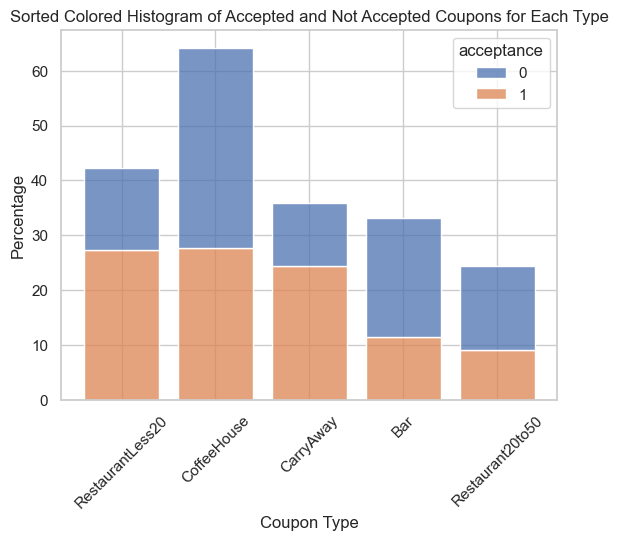

In [12]:
# Calculate the percentage of each 'acceptance' value within each 'coupon_type'
percentage_data = data.groupby(['coupon', 'acceptance']).size() / data.groupby('coupon').size() * 100
percentage_data = percentage_data.reset_index(name='percentage')

# Order coupon types by count
ordered_coupon_types = percentage_data.groupby('coupon')['percentage'].mean().sort_values(ascending=False).index

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a colored histogram with sorted coupon types and acceptance values
g = sns.histplot(data=data, x='coupon', hue='acceptance', multiple='stack', shrink=0.8,stat='percent', common_norm=False)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Coupon Type')
plt.ylabel('Percentage')
plt.title('Sorted Colored Histogram of Accepted and Not Accepted Coupons for Each Type')

# Show the plot
plt.show()

6. Use a histogram to visualize the temperature column.

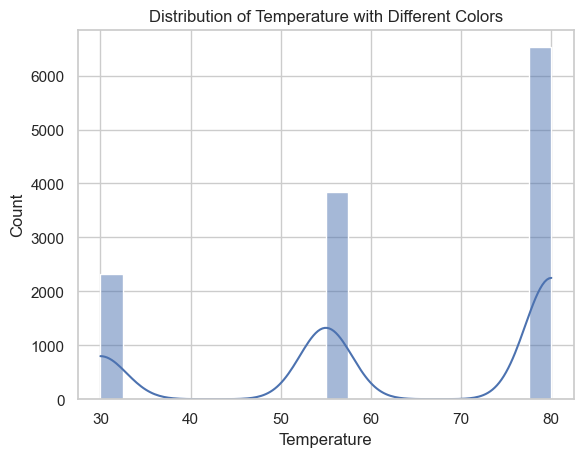

In [13]:
# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a histogram for the 'temperature' column with default color scheme
sns.histplot(data=data, x='temperature', bins=20, kde=True)

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Distribution of Temperature with Different Colors')

# Show the plot
plt.show()

In this version, I've added vertical dashed lines at the mean positions of 'temperature' for each weather state (sunny, rainy, snowy). You can customize the linestyle, color, and label according to your preferences.

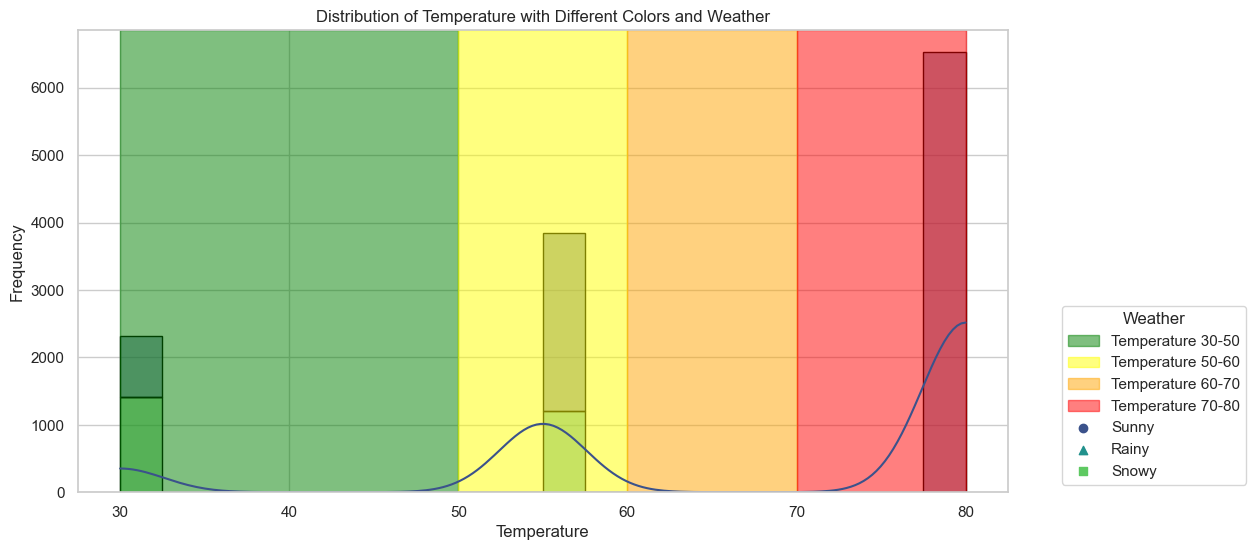

In [14]:
# Assume 'data' is your DataFrame
temperature_intervals = [(0, 30), (30, 50), (50, 60), (60, 70), (70, 80), (80, 90), (90, 100)]
colors = ['blue', 'green', 'yellow', 'orange', 'red']

# Create a single histogram with different colors for temperature intervals and 'weather' as hue
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='temperature', bins=20, kde=True, hue='weather', palette='viridis', multiple='stack', edgecolor='black')

# Iterate over temperature intervals and colors to create different colored bins
for interval, color in zip(temperature_intervals[1:], colors[1:]):
    plt.axvspan(interval[0], interval[1], color=color, alpha=0.5, label=f'Temperature {interval[0]}-{interval[1]}')

# Adding labels and title
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature with Different Colors and Weather')

# Display the legend with a better title
legend = plt.legend(title='Temperature Intervals', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding custom markers for the weather legend
weather_markers = {'Sunny': 'o', 'Rainy': '^', 'Snowy': 's'}

for i, (weather_category, color) in enumerate(zip(data['weather'].unique(), sns.color_palette('viridis', n_colors=len(data['weather'].unique())))):
    plt.scatter([], [], color=color, label=weather_category, marker=weather_markers.get(weather_category, 'o'))

# Display the combined legend
plt.legend(title='Weather', bbox_to_anchor=(1.05, 0), loc='lower left')

# Display the plot
plt.show()

In the next version, I've used a scatter plot where each point represents a combination of 'temperature' and 'weather'. Vertical dashed lines are still used to represent temperature intervals, and horizontal dashed lines represent the mean positions for each weather state. Adjust the marker style, size (s parameter), and other plot elements according to your preferences.

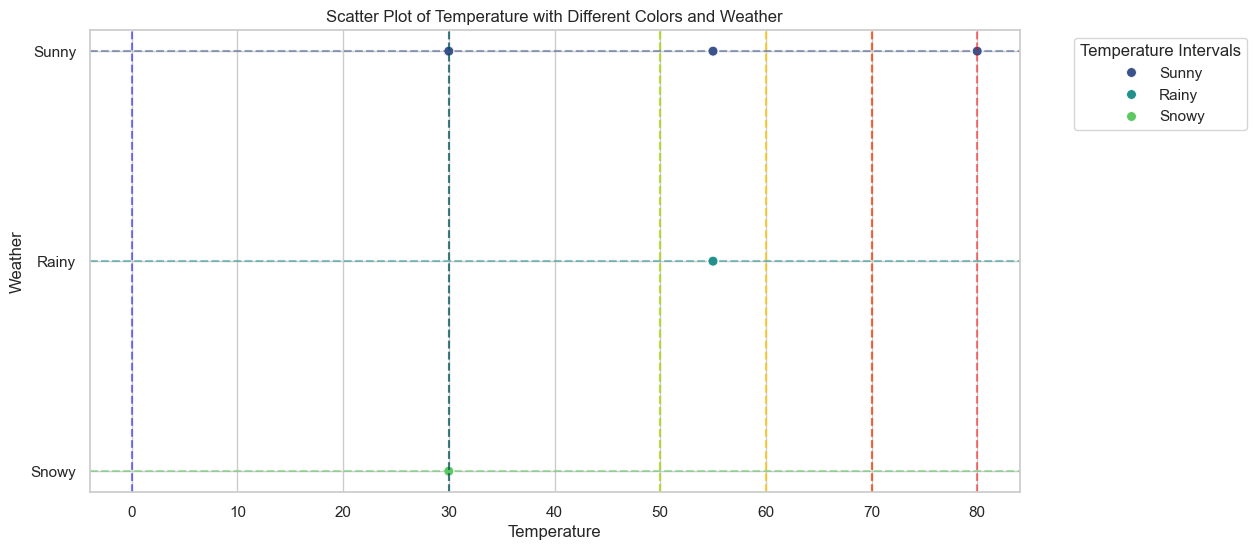

In [15]:
# Assume 'data' is your DataFrame
temperature_intervals = [(0, 30), (30, 50), (50, 60), (60, 70), (70, 80), (80, 90), (90, 100)]
colors = ['blue', 'green', 'yellow', 'orange', 'red']

# Create a scatter plot with different colors for temperature intervals and 'weather' as hue
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='temperature', y='weather', hue='weather', palette='viridis', marker='o', s=50)

# Iterate over temperature intervals and colors to create different colored markers
for interval, color in zip(temperature_intervals, colors):
    plt.axvline(interval[0], color=color, linestyle='--', alpha=0.5)
    plt.axvline(interval[1], color=color, linestyle='--', alpha=0.5)

# Adding labels and title
plt.xlabel('Temperature')
plt.ylabel('Weather')
plt.title('Scatter Plot of Temperature with Different Colors and Weather')

# Display the legend with a better title
plt.legend(title='Temperature Intervals', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding horizontal lines for each weather state
for i, (weather_category, color) in enumerate(zip(data['weather'].unique(), sns.color_palette('viridis', n_colors=len(data['weather'].unique())))):
    plt.axhline(i, color=color, linestyle='--', label=f'{weather_category} Mean', alpha=0.5)

# Display the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [16]:
# Assume 'data' is your original DataFrame
bar_coupons_df = data[data['coupon'] == 'Bar'].copy()
# Display the new DataFrame
print(bar_coupons_df.head())

# Assuming 'data' is your original DataFrame

# Create a new DataFrame with only 'Bar' coupons
bar_coupons_df = data[data['coupon'] == 'Bar'].copy()

# Display the new DataFrame
print(bar_coupons_df.head())

        destination passanger weather  temperature  time coupon  expiration  \
9   No Urgent Place      Kids   Sunny           80  10AM    Bar          24   
13             Home     Alone   Sunny           55   6PM    Bar          24   
17             Work     Alone   Sunny           55   7AM    Bar          24   
24  No Urgent Place   Friends   Sunny           80  10AM    Bar          24   
35             Home     Alone   Sunny           55   6PM    Bar          24   

    gender  age      maritalStatus  ...  CoffeeHouse CarryAway  \
9   Female   21  Unmarried partner  ...          0.0       0.0   
13  Female   21  Unmarried partner  ...          0.0       0.0   
17  Female   21  Unmarried partner  ...          0.0       0.0   
24    Male   21             Single  ...          1.0       6.0   
35    Male   21             Single  ...          1.0       6.0   

   RestaurantLessThan20  Restaurant20To50 toCoupon_GEQ5min  toCoupon_GEQ15min  \
9                   6.0               2.0      

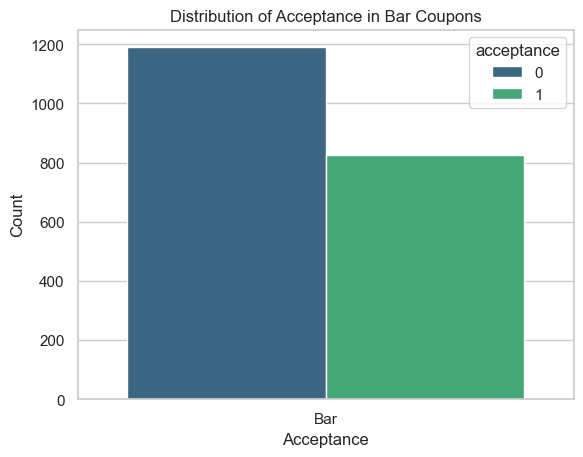

In [17]:
# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a bar plot to visualize the distribution of acceptance values in 'Bar' coupons
sns.countplot(x='coupon', data=bar_coupons_df, palette='viridis', hue='acceptance',legend=True)

# Add labels and title
plt.xlabel('Acceptance')
plt.ylabel('Count')
plt.title('Distribution of Acceptance in Bar Coupons')

# Show the plot
plt.show()

2. What proportion of bar coupons were accepted?


In [18]:
# Assuming 'bar_coupons_df' is your new DataFrame with only 'Bar' coupons

# Calculate the proportion of accepted 'Bar' coupons
proportion_accepted = (bar_coupons_df['acceptance'].sum() / len(bar_coupons_df)) * 100

# Print the result
print(f"The proportion of accepted Bar coupons: {proportion_accepted:.2f}%")

The proportion of accepted Bar coupons: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [19]:
# Assuming 'bar_coupons_df' is your new DataFrame with only 'Bar' coupons

# Create subsets based on the frequency of bar visits
less_than_or_equal_3 = bar_coupons_df[bar_coupons_df['Bar'] <= 3]
more_than_3 = bar_coupons_df[bar_coupons_df['Bar'] > 3]

# Calculate acceptance rates for each subset
acceptance_rate_less_than_or_equal_3 = less_than_or_equal_3['acceptance'].mean() * 100
acceptance_rate_more_than_3 = more_than_3['acceptance'].mean() * 100

# Print the results
print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {acceptance_rate_less_than_or_equal_3:.2f}%")
print(f"Acceptance rate for those who went to a bar more than 3 times a month: {acceptance_rate_more_than_3:.2f}%")

Acceptance rate for those who went to a bar 3 or fewer times a month: 37.07%
Acceptance rate for those who went to a bar more than 3 times a month: 76.88%


In [20]:
# Assuming 'data' is our DataFrame
columns_to_process = ['Bar']

# Now, perform the preprocessing define a function
def preprocess_columns(bar_coupons_df, columns_to_process):
    replacement_mapping = {
        '4~8': 6,
        '1~3': 2,
        'never': 0,
        'less1': 1,
        'gt8': 9
    }

    for column in columns_to_process:
        bar_coupons_df[column] = bar_coupons_df[column].replace(replacement_mapping)

# Apply the replace
preprocess_columns(bar_coupons_df, columns_to_process)

# Convert columns to numeric type
bar_coupons_df[columns_to_process] = bar_coupons_df[columns_to_process].apply(pd.to_numeric, errors='coerce')

# Replace NaN values with 0 in the specified columns
bar_coupons_df[columns_to_process] = bar_coupons_df[columns_to_process].fillna(0)

In [21]:
print(data["Bar"]>50)

0        False
1        False
2        False
3        False
4        False
         ...  
12679    False
12680    False
12681    False
12682    False
12683    False
Name: Bar, Length: 12684, dtype: bool


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?
    - It looks like your code is attempting to convert the 'Bar' column to a numeric type, replace NaN values with 0, create a subset based on specific criteria, and then calculate the acceptance rate for that subset using a function.

In [22]:
# Assuming 'data' is our DataFrame
columns_to_process = ['Bar']
# Convert columns to numeric type
data[columns_to_process] = data[columns_to_process].apply(pd.to_numeric, errors='coerce')

# Replace NaN values with 0 in the specified columns
data[columns_to_process] = data[columns_to_process].fillna(0)

# Define a function for calculate_eligible_drivers_percentage
def calculate_eligible_drivers_percentage(data):
    """
    Calculate the percentage of drivers who go to bars more than once a month, are over 25 years old, and have a positive outcome 'Y'.
    
    Parameters:
    - data (pd.DataFrame): The input DataFrame containing relevant columns.

    Returns:
    - float: The calculated percentage of eligible drivers.
    """
    eligible_drivers_query = "(Bar > 1) & (age > 25) & (acceptance == 1)"
    eligible_drivers_count = data.query(eligible_drivers_query)["Bar"].dropna().count()
    total_drivers_count = len(data["Bar"].dropna())
    eligible_drivers_percentage = (eligible_drivers_count / total_drivers_count) * 100

    return eligible_drivers_percentage

# Example usage:
# Assuming 'data' is your DataFrame
result = calculate_eligible_drivers_percentage(data)
print(f"The percentage of eligible drivers is approximately: {result:.2f}%")

The percentage of eligible drivers is approximately: 13.61%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
    - It looks like our code is attempting to convert the 'has_children' column to a numeric type, replace NaN values with 0, create a subset based on specific criteria, and then calculate the acceptance rate for that subset using a function.

In [23]:
# Assuming 'data' is our DataFrame
columns_to_process = ['has_children']

# Convert columns to numeric type
data[columns_to_process] = data[columns_to_process].apply(pd.to_numeric, errors='coerce')

# Replace NaN values with 0 in the specified columns
data[columns_to_process] = data[columns_to_process].fillna(0)

# Define function compare_acceptance_rate
def compare_acceptance_rate(data):
    """
    Compare the acceptance rate between drivers who go to bars more than once a month, had passengers that were not kids, and had occupations other than 'Farming Fishing & Forestry'.
    
    Parameters:
    - data (pd.DataFrame): The input DataFrame containing relevant columns.

    Returns:
    - float: The acceptance rate for eligible drivers.
    - float: The acceptance rate for all others.
    """
    eligible_drivers_query = "(Bar > 1) & (has_children == 0) & ~occupation.isin(['Farming', 'Fishing', 'Forestry'])"
    others_query = "~((Bar > 1) & (has_children == 0) & ~occupation.isin(['Farming', 'Fishing', 'Forestry']))"

    eligible_drivers_count = data.query(eligible_drivers_query)["acceptance"].mean() * 100
    others_count = data.query(others_query)["acceptance"].mean() * 100

    return eligible_drivers_count, others_count

# Assuming 'data' is our DataFrame
eligible_rate, others_rate = compare_acceptance_rate(data)
print(f"Acceptance rate for eligible drivers: {eligible_rate:.2f}%")
print(f"Acceptance rate for all others: {others_rate:.2f}%")

Acceptance rate for eligible drivers: 61.72%
Acceptance rate for all others: 55.47%


In [24]:
print(data['maritalStatus'])
print(data['Bar'])
print(data['has_children'])
print(data['income'])
print(data['RestaurantLessThan20'])

0        Unmarried partner
1        Unmarried partner
2        Unmarried partner
3        Unmarried partner
4        Unmarried partner
               ...        
12679               Single
12680               Single
12681               Single
12682               Single
12683               Single
Name: maritalStatus, Length: 12684, dtype: object
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12679    0.0
12680    0.0
12681    0.0
12682    0.0
12683    0.0
Name: Bar, Length: 12684, dtype: float64
0        1
1        1
2        1
3        1
4        1
        ..
12679    0
12680    0
12681    0
12682    0
12683    0
Name: has_children, Length: 12684, dtype: int64
0        43750.0
1        43750.0
2        43750.0
3        43750.0
4        43750.0
          ...   
12679    81250.0
12680    81250.0
12681    81250.0
12682    81250.0
12683    81250.0
Name: income, Length: 12684, dtype: float64
0        6.0
1        6.0
2        6.0
3        6.0
4        6.0
    

6. Compare the acceptance rates between those drivers who:

- **Criteria #1:** go to bars more than once a month, had passengers that were not a kid, and were not widowed
- **Criteria #2:** go to bars more than once a month and are under the age of 30
- **Criteria #3:** go to cheap restaurants more than 4 times a month and income is less than 50K.

In [47]:
# Assuming 'data' is our DataFrame
data
columns_to_process = ['has_children', 'Bar', 'RestaurantLessThan20', 'income']

# Convert columns to numeric type
data[columns_to_process] = data[columns_to_process].apply(pd.to_numeric, errors='coerce')

# Replace NaN values with 0 in the specified columns
data[columns_to_process] = data[columns_to_process].fillna(0)

def compare_acceptance_rates(data):
    """
    Compare the acceptance rates between different groups of drivers based on specific criteria.
    
    Parameters:
    - data (pd.DataFrame): The input DataFrame containing relevant columns.

    Returns:
    - float: Acceptance rate for drivers who go to bars more than once a month, had passengers that were not kids, and were not widowed.
    - float: Acceptance rate for drivers who go to bars more than once a month and are under the age of 30.
    - float: Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and have income less than 50K.
    """
    # Criteria 1
    criteria1_query = "(has_children == 0) & (Bar > 1) & (maritalStatus != 'Widowed')"
    acceptance_rate_criteria1 = data.query(criteria1_query)["acceptance"].mean() * 100

    # Criteria 2
    criteria2_query = "(Bar > 1) & (age < 30)"
    acceptance_rate_criteria2 = data.query(criteria2_query)["acceptance"].mean() * 100

    # Criteria 3
    criteria3_query = "(RestaurantLessThan20 > 4) & (income < 50000)"
    acceptance_rate_criteria3 = data.query(criteria3_query)["acceptance"].mean() * 100

    return acceptance_rate_criteria1, acceptance_rate_criteria2, acceptance_rate_criteria3

# Apply the function to data
# Example usage:
# Assuming 'data' is your DataFrame
rate1, rate2, rate3 = compare_acceptance_rates(data)
print(f"Acceptance rate for drivers with criteria 1: {rate1:.2f}%")
print(f"Acceptance rate for drivers with criteria 2: {rate2:.2f}%")
print(f"Acceptance rate for drivers with criteria 3: {rate3:.2f}%")ith criteria 3: {rate3:.2f}%")
n


SyntaxError: invalid decimal literal (3063992893.py, line 43)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [48]:
def calculate_chi2_p_value(chi2_stat, degrees_of_freedom):
    """
    Calculate the p-value using the chi-square distribution.

    Parameters:
    - chi2_stat (float): The chi-square statistic.
    - degrees_of_freedom (int): Degrees of freedom.

    Returns:
    - float: The p-value.
    """
    return 1 - np.sum(np.random.chisquare(degrees_of_freedom, size=1000000) >= chi2_stat) / 1000000

# Example usage:
# Assuming you have calculated chi2_stat and degrees_of_freedom
# Replace these values with your actual chi-square statistic and degrees of freedom
chi2_stat = 10.0
degrees_of_freedom = 3

# Calculate p-value using the function
p_value = calculate_chi2_p_value(chi2_stat, degrees_of_freedom)
print(p_value)

0.981577


In [49]:
# Define function for chi_square_test using numpy libraries
def chi_square_test(data, column1, column2, target_column, alpha=0.05):
    """
    Perform a chi-square test of independence.

    Parameters:
    - data (pd.DataFrame): The input DataFrame.
    - column1 (str): The name of the first categorical column.
    - column2 (str): The name of the second categorical column.
    - target_column (str): The name of the target categorical column for which acceptance rates are measured.
    - alpha (float): The significance level (default is 0.05).

    Returns:
    - bool: True if the null hypothesis is rejected, indicating a significant association.
    """
    # Create a contingency table
    contingency_table = pd.crosstab(index=data[column1], columns=data[column2], values=data[target_column], aggfunc='mean')

    # Calculate the chi-square statistic manually
    observed_values = contingency_table.to_numpy()
    chi2_stat = np.sum((observed_values - np.mean(observed_values))**2 / np.mean(observed_values))

    # Degrees of freedom
    degrees_of_freedom = (observed_values.shape[0] - 1) * (observed_values.shape[1] - 1)

    # Calculate p-value using function chi-square distribution
    p_value = 1 - calculate_chi2_p_value(chi2_stat, degrees_of_freedom)

    # Check if the p-value is less than alpha
    return p_value < alpha

- Apply chi_square_test to "data"

In [50]:
# Assuming 'data' is your DataFrame
result = chi_square_test(data, 'age', 'Bar', 'acceptance')

if result:
    print("Reject the null hypothesis. There is a significant association between age, bar visits, and acceptance of bar coupons.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between age, bar visits, and acceptance of bar coupons.")

Reject the null hypothesis. There is a significant association between age, bar visits, and acceptance of bar coupons.


This code uses the pd.crosstab function to create a contingency table, where the rows represent whether the driver is over the age of 25 (age > 25), the columns represent whether the driver goes to bars more than once a month (Bar > 1), and the values are the counts of acceptance (acceptance). The resulting table provides a frequency distribution of these variables.

Adjust the column names according to your actual dataset. The frequency distribution will help you visualize the counts of different combinations of age, bar visits, and acceptance of bar coupons, which may further support or illustrate the observed associations.

In [51]:
# Assuming 'data' is your DataFrame
# Create a new columns based on the condition
data['is_over_25'] = data['age'] > 25
data['is_over_1'] = data['Bar'] > 1

contingency_table = pd.crosstab(index=data['is_over_25'], columns=data['is_over_1'], values=data['acceptance'], aggfunc='count')

# Print the frequency distribution
print("Frequency Distribution:")
print(contingency_table)

Frequency Distribution:
is_over_1   False  True 
is_over_25              
False        2079   1121
True         6707   2777


To visualize the hypothesis distribution, you can create a bar plot or heatmap of the contingency table. Here's an example using Python with matplotlib and seaborn:

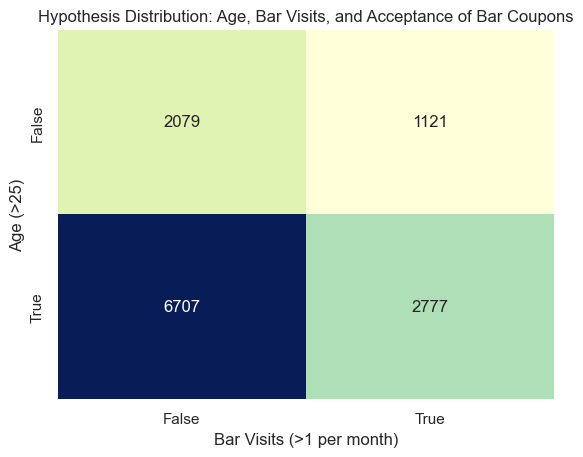

In [52]:
# Assuming 'data' is your DataFrame
# Create a new columns based on the condition
data['is_over_25'] = data['age'] > 25
data['is_over_1'] = data['Bar'] > 1

# Create a contingency table
contingency_table = pd.crosstab(index=data['is_over_25'], columns=data['is_over_1'], values=data['acceptance'], aggfunc='count')

# Create a bar plot or heatmap
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d", cbar=False)
plt.xlabel('Bar Visits (>1 per month)')
plt.ylabel('Age (>25)')
plt.title('Hypothesis Distribution: Age, Bar Visits, and Acceptance of Bar Coupons')
plt.show()

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  